In [1]:
import numpy as np
import pandas as pd

In [2]:
def processText(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [3]:
csv1=pd.read_csv('dataFromReddit_ProgrammingLanguages.csv')

In [4]:
len(csv1)

857

In [5]:
csv2=pd.read_csv('dataFromReddit_programming.csv')

In [6]:
len(csv2)

752

In [7]:
import sys
import json
import string
import pandas as pd
from collections import Counter
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as mpl
from nltk.tokenize import word_tokenize

# load csv file
fCsvName = 'dataFromReddit_ProgrammingLanguages.csv'


# tweet tokeniser to use
tweetTokeniser = nltk.word_tokenize
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

# number of most frequent terms to display
freqNum = 30

# read csv data
csvPD=pd.read_csv(fCsvName)
title_list = csv1['Title'].tolist()+csv1['Body'].tolist()+csv2['Title'].tolist()+csv2['Body'].tolist()
title_list = [x for x in title_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in title_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

    # update count
    termFreqCounter.update(lTokens)

freqList = termFreqCounter.most_common(freqNum)
    
# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))

languag: 703
program: 459
's: 318
thi: 292
use: 275
code: 264
like: 227
``: 224
'': 221
compil: 203
http: 194
type: 194
work: 190
n't: 185
function: 184
would: 172
ha: 163
make: 158
ani: 155
one: 151
design: 150
wa: 148
'm: 147
implement: 146
've: 143
write: 140
think: 134
new: 126
whi: 126
featur: 123


In [9]:
# get coding language key words
key = ['c', 'python', 'java', 'javascript', 'js','c#','ruby','c++','swift','jquery','r']

In [10]:
coding_list = [(t,f) for t,f in termFreqCounter.items() if t in key]

In [11]:
coding_list

[('python', 80),
 ('js', 10),
 ('javascript', 33),
 ('java', 45),
 ('c', 104),
 ('swift', 16),
 ('c++', 56),
 ('r', 7)]

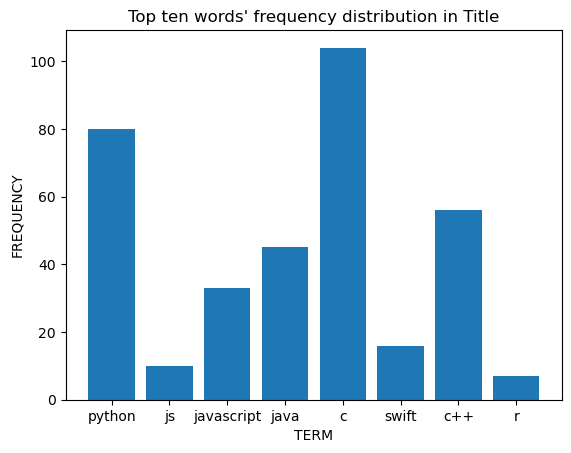

In [12]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("Top ten words\' frequency distribution in Title")
mpl.ylabel('FREQUENCY')
mpl.xlabel('TERM')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()

In [13]:
termFreqCounter2 = Counter()
comment_list = csv1['TopComment'] + csv2['TopComment']
comment_list = [x for x in comment_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in  comment_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

    # update count
    termFreqCounter2.update(lTokens)

# print out most common terms
for term, count in termFreqCounter2.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))
        # remove quotation marks
freqList = termFreqCounter2.most_common(30)

coding_list = [(t,f) for t,f in termFreqCounter2.items() if t in key]

thi: 489
's: 375
n't: 326
use: 313
like: 284
http: 278
languag: 278
``: 258
'': 255
wa: 236
work: 225
one: 220
code: 201
get: 193
think: 190
would: 187
make: 181
program: 180
also: 168
thing: 165
ha: 162
doe: 161
time: 151
type: 150
realli: 149
need: 146
even: 143
ani: 142
good: 138
veri: 138


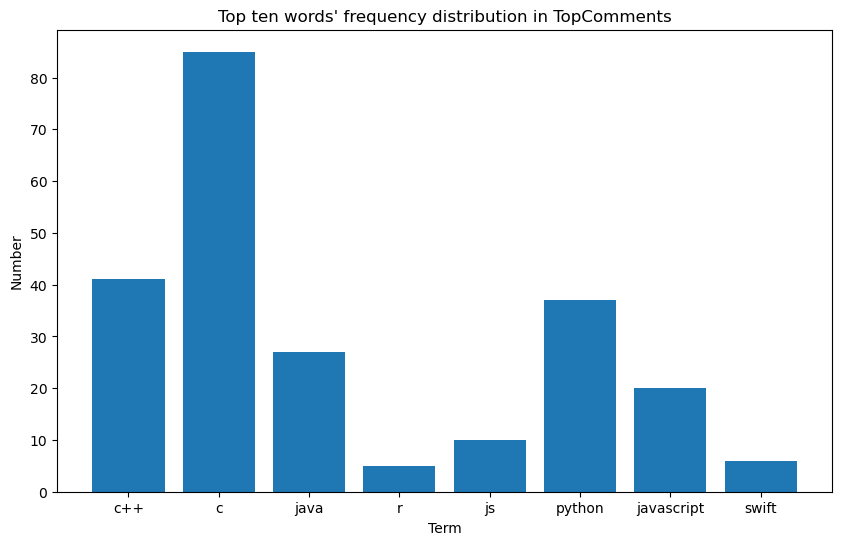

In [14]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("Top ten words\' frequency distribution in TopComments")
mpl.ylabel('Number')
mpl.xlabel('Term')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()

The frequence of C issue
Tokenization Issue: If you're using a basic tokenization approach, then individual characters like "c" might be extracted as tokens from various words. For instance, the word "coding" would be tokenized as "cod" and "ing", and the term "c" would be mistakenly counted.

Solution1: Use NLTK tokenize function
Solution2: Consider verifying the context or applying further filtering, like C program, C language

In [15]:
def handleC(filtered_tokens,count):
    final_tokens = []
    for i, word in enumerate(filtered_tokens):
        if word == "c" and (i == 0 or i == len(filtered_tokens) - 1):
            # If "c" appears at the beginning or end of the token list, consider removing it
            count+=1
            continue
        elif word == "c" and (filtered_tokens[i-1] not in ["programming","languag","learn" ,"language"] and filtered_tokens[i+1] not in ["programming","learn","languag", "language"]):
            # If "c" is not preceded or followed by "programming" or "language", consider removing it
            count+=1
            continue
        else:
            final_tokens.append(word)
    return final_tokens

In [16]:
termFreqCounter = Counter()
count = 0

In [17]:

# number of most frequent terms to display
freqNum = 30


# read csv data
csvPD=pd.read_csv(fCsvName)
title_list = csv1['Title'].tolist()+csv1['Body'].tolist()+csv2['Title'].tolist()+csv2['Body'].tolist()
title_list = [x for x in title_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in title_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)
    print(lTokens)
    lTokens = handleC(lTokens,count)
    
    
    # update count
    
    termFreqCounter.update(lTokens)



['charact', 'like', 'python', 'art', 'might', 'ani', 'english', 'look', 'concept', 'without', 'japanes']
['dreamberd', 'perfect', 'program', 'languag']
['relat', 'ban', 'chatgpt', 'post']
['new', 'program', "'ve", 'develop', 'languag']
['introduc', 'cat', 'esoter', 'program', 'languag']
['wikipedia', 'paradigm', 'thi', 'languag', 'relationship', 'result', 'document', 'program', 'analyz', 'visual']
['html', 'layer', 'syntax', 'thought', 'right', 'write', 'thi', 'left', 'custom', 'compil', 'think']
['keyword', 'declar', 'variou', 'http', 'function', 'program', '//twitter.com/code_report/status/1325472952750665728', 'use', 'sourc', 'languag']
['graydon', 'rust', 'futur', 'hoar', 'want']
['program', 'clickbait', 'headlin', 'languag']
['period', 'tabl', 'program', 'languag']
['syntax', 'launch', 'scene', 'stori', 'highlight', 'notepad++', 'game', 'class', 'courtesi', 'pars', 'languag', "'s", 'wrote', 'program', 'compil', 'chapter', 'code', 'choic', 'interact', 'fiction']
['sub', 'thi', 'fit

['could', 'fulli', 'use', "n't", 'two', 'professor', 'exampl', 'languag', 'share', 'learn', 'raku', 'impress', 'program', 'formerli', 'code', 'enthusiast', 'bad', 'kind', 'veri', 'belong', 'also', 'messi', 'default', 'renam', 'stuff', 'unread', 'would', 'thi', 'bunch', 'rap', 'mistaken', 'still', 'disclaim', 'consid', 'consist', 'expect', 'obvious', 'uni', 'like', 'everyth', 'kinda', 'choic', "'m", 'sorri', 'op', 'thank', 'featur', 'design', 'curv', 'concis', 'write', 'read', 'ago', 'encount', 'nobodi', 'doe', 'wa', 'grammar', 'perl', 'releas', 'practic', 'onli', 'true', 'post', 'year', 'want', 'got', 'hobbi', 'array', 'includ', 'disciplin', 'readabl', 'week', 'ha', 'recommend', 'extrem', 'immut', 'boy', 'interest', 'function', 'usual', 'quit', 'cool', 'even', 'yet', 'chang', 'argument', 'probabl', 'peopl', 'ye', 'howev', 'unfortun', 'clean']
['name', 'http', 'xz', '//seed7.sourceforge.net/scrshots/tar7.htm', 'ffi', 'concept', 'area', 'use', 'jpeg', 'implement', 'inflat', 'c', 'lzw', '

['intimid', 'use', 'implement', 'optim', 'rid', 'languag', 'mainli', 'popular', 'huge', 'program', 'much', 'simpler', 'code', 'topic', 'veri', 'partial', 'realiz', 'actual', 'thi', 'new', 'explain', 'specif', 'like', 'becaus', "'m", 'track', 'resourc', 'thing', 'toy', 'read', 'mani', 'lot', 'enabl', 'especi', 'valu', 'end', 'get', 'base', 'equival', 'interpret', 'type', 'pre-evalu', 'written', 'time', 'simpl', 'effect', 'intermedi', 'inlin', 'unnecessari', 'certain', 'evaluation/abstract', 'interest', 'function', 'prove', 'possibl', 'step', 'good', 'compil', 'sourc', 'system', 'automat', 'open']
['swift', 'experi', 'thing', 'thank', 'design', 'team', 'need', 'phd', 'appl', 'made', 'languag', 'cs', 'exist', '’', 'program', 'rust', 'get', 'curiou', 'like', 'mozilla', 'master', 'build']
['lustr', 'name', 'known', 'http', 'concept', 'use', 'mar', 'command', 'static', 'built', 'unlik', 'broadli', 'arithmet', 'littl', 'languag', '//fprime-community.github.io/fpp/fpp-users-guide.html', 'robot

['could', 'syntax', 'n00b', 'http', 'hack', 'use', 'long', 'implement', 'newlin', 'databas', 'shed', 'kept', 'c', 'exampl', 'languag', 'short', 'list', '//eev.ee/blog/2012/04/09/php-a-fractal-of-bad-design/', 'singular', 'understand', 'primari', 'alway', 'els', 'better', 'matter', 'aw', 'broken.', 'bad', 'anyon', 'veri', 'horror', 'work', 'link', 'realiz', 'whi', 'drew', 'mean', 'app', 'stuff', 'easi', 'harder', 'ani', 'thi', 'claim', 'paper', 'hard', 'histor', 'php', 'consid', 'wrote', 'ordinari', 'wash.', 'cumbersom', 'like', 'complet', 'closur', 'kinda', 'becaus', 'semant', 'partli', 'slip', 'thing', 'mess', 'hour', 'design', 'look', 'half', 'random', 'stage', 'write', 'read', 'error', 'wa', "'s", 'middlewar', 'us', '’', 'onlin', 'reason', 'end', 'onli', 'perfectli', 'want', '”', 'separ', 'got', 'see', 'annihil', 'puzzl', 'think', 'outsid', 'stupid', 'difficult', 'dev', 'written', 'took', 'connect', 'one', 'togeth', 'onc', 'possibl', 'b', 'tear', 'even', 'book', 'use-cas', '“', 'see

['syntax', 'pretty-print', 'name', 'http', 'reasearch', 'weird', 'normal', 'right', 'suitabl', 'lex', 'use', 'famili', "n't", 'i.e.', 'command', 'higher-level', 'implement', 'surfac', 'racket', 'n-ari', 'introduc', 'wan', 'detail', 'ml-like', 'exampl', 'languag', 'list', 'respect', 'limit', 'though', 'short', 'share', 'repl', 'bug', 'repositori', 'persist', 'demonstr', 'program', 'match', 'α-equival', 'specifi', 'fun', 'comment', 'algebra', 'librari', 'extens', 'e2', 'grad', "''", 'code', 'easily-impl', 'core', 'show', 'oper', 'tool', 'gotten', 'revis', 'na', 'loop', 'also', 'gobba', 'unimpl', 'view', '//github.com/paulstansifer/unseemly/issu', 'link', 'modulo', 'easi', 'final', 'current', 'scheme-lik', 'ani', 'thi', 'pars', 'contain', 'histori', 'bunch', 'easili', 'prototyp', 'destructur', 'uniqu', 'quot', 'point', 'hard', 'miss', 'moment', 'low-level', 'unseemli', 'ca', 'document', 'new', 'hygen', 'plu', 'type-check', 'pervers', 'given', 'manual', 'weirder', 'ecosystem', 'like', 'far

['idea', 'headach', 'could', 'style', 'syntax', 'execut', 'remind', 'concept', 'use', 'print_list', '==', 'statement', 'implement', 'add', 'notat', 'next', 'freedom', 'reorder', 'c', 'list', 'languag', 'curli', 'within', 'general-purpos', 'wish', 'understand', 'place', 'addit', 'guess', 'if-stat', 'match', 'much', 'buzz', 'constantli', "''", 'code', 'first', 'kind', 'loop', 'also', 'partial', 'work', 'switch', 'low', 'erlang', 'whi', 'found', 'develop', 'println', 'guard2', 'ani', 'would', 'guard1', 'flaw', 'thi', 'print', 'regular', 'fizzbuzz', 'hacki', 'arrow', 'behind', 'n', 'fork', 'specif', 'success', '-like', 'construct', 'like', 'purpos', 'allow', 'stand', 'evalu', 'came', 'collect', 'follow', 'rather', 'x', 'pass', 'expr3', 'glare', 'expr1', 'iter', 'endless', 'wonder', 'divis', 'none', 'opinion', 'expr2', 'doe', 'lot', 'made', '-loop', '...', 'express', 'wa', "'s", 'meant', 'tl', 'make', '.\\n', 'condit', 'high', 'valu', 'reason', 'rust', 'end', 'test', 'tri', 'true', 'got', '

['could', 'use', "n't", 'someth', 'c', 'exampl', 'languag', '2017.', 'paramet', 'give', 'java', "''", '--', 'bad', 'call', 'rememb', 'rubi', 'work', 'whi', 'would', 'thi', 'profession', 'apolog', 'ca', 'return', 'int', 'construct', 'like', 'far', 'realli', 'changevalu', "'ve", 'somewher', 'leav', "'m", 'x', "'ll", 'python', 'back', 'thing', 'write', 'none', 'read', 'wa', "'s", 'practic', 'valu', 'true', 'terminolog', 'job', 'know', 'wrong', '``', 'function', 'void', 'cool', 'anymor', 'chang', 'seen', 'sinc', 'peopl', 'howev', 'public']
['http', 'implement', 'languag', 'hi', 'program', 'everyon', '//codeberg.org/anaseto/goal/src/branch/master/docs/implementation.md', 'note', 'call', '//codeberg.org/anaseto/go', 'thi', 'point', 'unorigin', 'consid', 'wrote', 'bqn', 'given', 'like', 'sub', "'m", 'string', "'ll", 'back', 'thing', 'rephras', 'ago', 'apl', 'nice', 'regexp', "'s", 'primit', 'k', 'obscur', 'year', '”', 'theme', 'integr', 'vector', 'j', 'text-handl', 'atom', 'array', 'typic', '

In [18]:
termFreqCounter['c']

28

In [19]:
freqList = termFreqCounter.most_common(freqNum)
    
# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))

languag: 703
program: 459
's: 318
thi: 292
use: 275
code: 264
like: 227
``: 224
'': 221
compil: 203
http: 194
type: 194
work: 190
n't: 185
function: 184
would: 172
ha: 163
make: 158
ani: 155
one: 151
design: 150
wa: 148
'm: 147
implement: 146
've: 143
write: 140
think: 134
new: 126
whi: 126
featur: 123


In [20]:
count

123

In [21]:
coding_list = [(t,f) for t,f in termFreqCounter.items() if t in key]

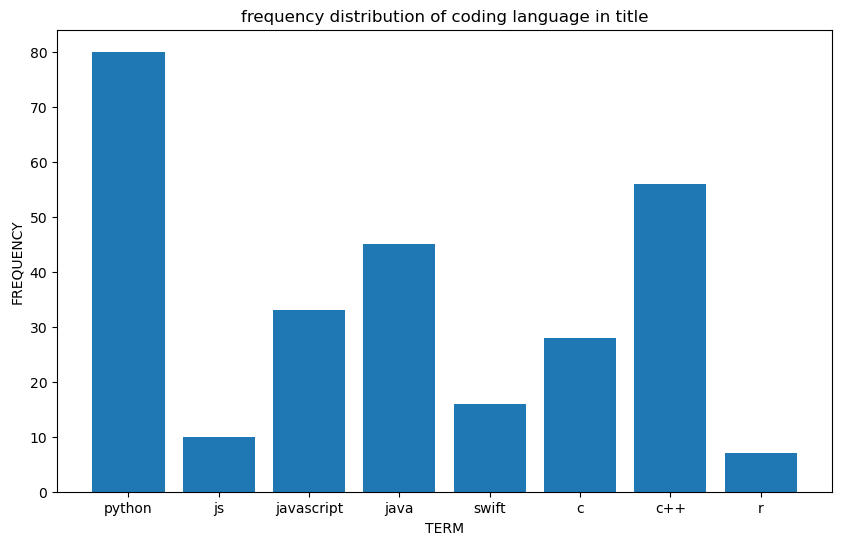

In [22]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("frequency distribution of coding language in title")
mpl.ylabel('FREQUENCY')
mpl.xlabel('TERM')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()

In [23]:
termFreqCounter2 = Counter()
comment_list = csv1['TopComment'] + csv2['TopComment']
comment_list = [x for x in comment_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in  comment_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)
    lTokens = handleC(lTokens,count)
    # update count
    termFreqCounter2.update(lTokens)

# print out most common terms
for term, count in termFreqCounter2.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))
        # remove quotation marks
freqList = termFreqCounter2.most_common(30)

coding_list = [(t,f) for t,f in termFreqCounter2.items() if t in key]

thi: 489
's: 375
n't: 326
use: 313
like: 284
http: 278
languag: 278
``: 258
'': 255
wa: 236
work: 225
one: 220
code: 201
get: 193
think: 190
would: 187
make: 181
program: 180
also: 168
thing: 165
ha: 162
doe: 161
time: 151
type: 150
realli: 149
need: 146
even: 143
ani: 142
good: 138
veri: 138


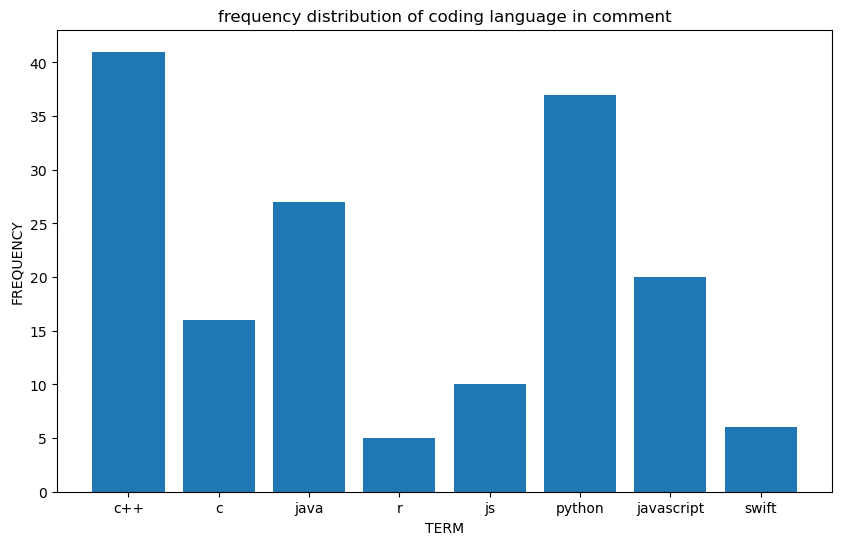

In [24]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("frequency distribution of coding language in comment")
mpl.ylabel('FREQUENCY')
mpl.xlabel('TERM')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()